In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
train_data = pd.read_csv("/Users/alexbesch/Documents/Spring 2024/CSCI____- Introduction to Data Mining/Group Project 1/Ensemble/DM_creditcard_2023_train_90_percent.csv", header=0)
test_data = pd.read_csv("/Users/alexbesch/Documents/Spring 2024/CSCI____- Introduction to Data Mining/Group Project 1/Ensemble/DM_creditcard_2023_test_10_percent.csv", header=0)
train_data = train_data.drop(columns=['id'])
# test_data = test_data.drop(columns=['id'])
print("Data Head: ", train_data.head())
print("Data Loaded Successfully!")

Data Head:           V1        V2        V3        V4        V5        V6        V7  \
0  0.138788 -2.041620 -0.267255 -0.523039 -0.217336  0.028460  1.056935   
1 -0.407531 -0.181946 -0.610728 -0.007705 -0.620047  1.166402  0.618784   
2 -1.522526  1.314583 -1.741485  1.689275 -1.842091 -2.329303 -1.836163   
3  1.002687 -0.789457  1.246728 -0.896486 -0.272527  0.313148  0.095158   
4 -0.750979  0.438370 -0.127968  0.530866 -0.434634  0.591616 -0.079987   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.269759  1.564354  0.179943  ...  0.159911 -0.207262 -0.973744  0.272104   
1  0.077837 -0.097612 -0.746625  ...  0.185614  0.529432  1.211107 -0.671787   
2  1.808726 -1.090039 -2.170769  ...  0.829552  0.082825 -1.004728  0.861494   
3 -0.124567  0.273045  0.913364  ...  0.054489  1.038219 -0.156040  1.271257   
4 -0.653829  1.617049  0.413244  ...  0.614054 -0.041665  0.113311  0.776677   

        V25       V26       V27       V28    Amount  Cla

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


y_train = train_data['Class_label']
X_train = train_data.drop(columns=['Class_label'])

y_test = test_data['Class_label']
X_test = test_data.drop(columns=['Class_label'])
X_test = X_test.drop(columns=['id'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

num_neighbors = 2
accuracy_dict = ''
confusion_matrix_dict = ''

knn = KNeighborsClassifier(n_neighbors=num_neighbors)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

knn.fit(x_train_scaled, y_train)
knn_pred = knn.predict(x_test_scaled)
print (f" Accuracy for k-nn when Num_neighbors={num_neighbors} is {accuracy_score(y_test, knn_pred)}")
accuracy_dict = accuracy_score(y_test, knn_pred)

conf_matrix = confusion_matrix(y_test, knn_pred)
confusion_matrix_dict = conf_matrix
    
df_knn_pred = pd.DataFrame({"KNN_pred" : knn_pred})

combined = pd.concat([test_data, df_knn_pred], axis=1)

combined.to_csv('./Ensemble/test_data_with_kNN_predictions.csv', index=False)

print("Accuracy Dict: ", accuracy_dict)
print("Confusion Matrix Dict: ", confusion_matrix_dict)
print("KNN Prediction shape: ", len(knn_pred))






 Accuracy for k-nn when Num_neighbors=2 is 0.9992613826213882
Accuracy Dict:  0.9992613826213882
Confusion Matrix Dict:  [[28460    39]
 [    3 28361]]
KNN Prediction shape:  56863


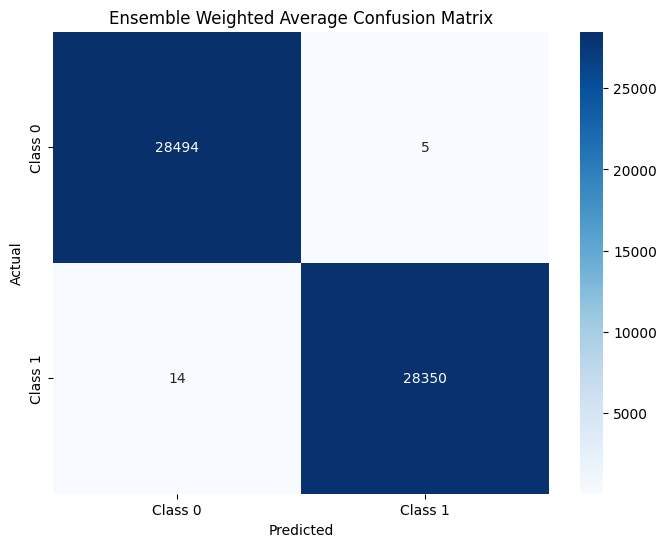

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = [[28494, 5], [14, 28350]]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Weighted Average Confusion Matrix')
plt.show()